# Mnist 数据集
- 训练集：60000
- 测试集：10000
- 图片：28x28x1 $\rightarrow$ 784

In [3]:
import numpy as np
import time
from tqdm import tqdm

In [11]:
# load data
def load_data(fileName):
    print("Start to read data ...")
    
    # list with data and label
    dataArr = []
    labelArr = []
    
    # open file
    fr = open(fileName, 'r')
    # read data through row
    for line in tqdm(fr.readlines()):
        curline = line.strip().split(',')
        
        # Mnist data is 0 - 9, 二分类 >=5 为 1 < 5 -1
        if int(curline[0]) >= 5:
            labelArr.append(1)
        else:
            labelArr.append(-1)
            
        # Data
        dataArr.append([int(num) / 255 for num in curline[1:]])
    
    return dataArr, labelArr

In [5]:
# Perceptron
def MyPercptron(dataArr, labelArr, iter = 5):
    dataMat = np.mat(dataArr)
    labelMat = np.mat(labelArr).T
    
    m, n = np.shape(dataMat)
    
    w = np.ones((1, np.shape(dataMat)[1]))
    b = 0
    step = 0.001
    
    # Max Iter
    for k in range(iter):
        for i in range(m):
            xi = dataMat[i]
            yi = labelMat[i]
            
            #condition
            if -1 *  yi * (w * xi.T + b) >=0:
                w = w+ step * yi * xi
                b = b + step * yi
                
        print("Round %d: %d trainning " % (k, iter))
    
    return w, b

In [31]:
def model_test(dataArr, label_Arr, w, b):
    dataMat = np.mat(dataArr)
    labelMat = np.mat(label_Arr).T
    
    m, n = np.shape(dataMat)
    
    errorCnt = 0
    
    for i in range(m):
        xi = dataMat[i]
        yi = labelMat[i]
        
        result = -1 * yi * (w * xi.T + b)
        
        if result >= 0:
            errorCnt += 1
            
    accruRate = 1 - (errorCnt / m)
    return accruRate
    

In [32]:
if __name__ == '__main__':
    start = time.time()
    
    train_data, train_label = load_data("./mnist/mnist_train.csv")
    test_data, test_label = load_data("./mnist/mnist_test.csv")
    
    w, b = MyPercptron(train_data, train_label, iter = 5)
    
    accruRate = model_test(test_data, test_label, w, b)
    
    end = time.time()
    
    print('accruacy is ', accruRate)
    print('time spend ', end - start)

Start to read data ...


100%|███████████████████████████████████| 60000/60000 [00:09<00:00, 6145.48it/s]


Start to read data ...


100%|███████████████████████████████████| 10000/10000 [00:01<00:00, 6233.09it/s]


Round 0: 5 trainning 
Round 1: 5 trainning 
Round 2: 5 trainning 
Round 3: 5 trainning 
Round 4: 5 trainning 
accruacy is  0.8464
time spend  25.548049926757812


In [33]:
test_dataMat = np.mat(test_data)
test_labelMat = np.mat(test_label)
print(test_dataMat.shape, test_labelMat.shape)

(10000, 784) (1, 10000)


In [84]:
y_pred =  w * test_dataMat.T + b
y_pred_ = np.asarray(y_pred)
y_predict = [-1 if i <=0 else 1 for i in y_pred_[0]]

In [87]:
y_true = test_label

# confusion matrix

In [88]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# import numpy as np
%matplotlib inline

In [94]:
def plot_confusion_matrix(true_label, pred_label, class_name):
    y_true = true_label
    y_pred = pred_label
    confusion_mat = confusion_matrix(y_true, y_pred)
    print(confusion_mat)
    
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    
    plt.figure(figsize=(4, 3), dpi = 300)
    plt.imshow(confusion_mat, cmap = plt.cm.get_cmap("Blues"))
    plt.colorbar()
    
    indices = range(len(confusion_mat))
    
    plt.xticks(indices, class_name, rotation = 0)
    plt.yticks(indices, class_name)
    
    plt.title("confusion matrix", fontdict={'fontsize': 12})
    plt.xlabel("Predcited label", fontdict={'fontsize': 12})
    plt.ylabel("True label", fontdict= {'fontsize': 12})
    
    for first_index in range(len(confusion_mat)):
        for second_index in range(len(confusion_mat[first_index])):
            if first_index == second_index:
                plt.text(first_index, second_index, confusion_mat[first_index][second_index],
                        color = 'white', fontsize = 12, va = 'center', ha = 'center')
            else:
                plt.text(first_index, second_index, confusion_mat[first_index][second_index],
                        color = 'black', fontsize = 12, va = 'center', ha = 'center')
                
    plt.show()

[[4387  752]
 [ 784 4077]]


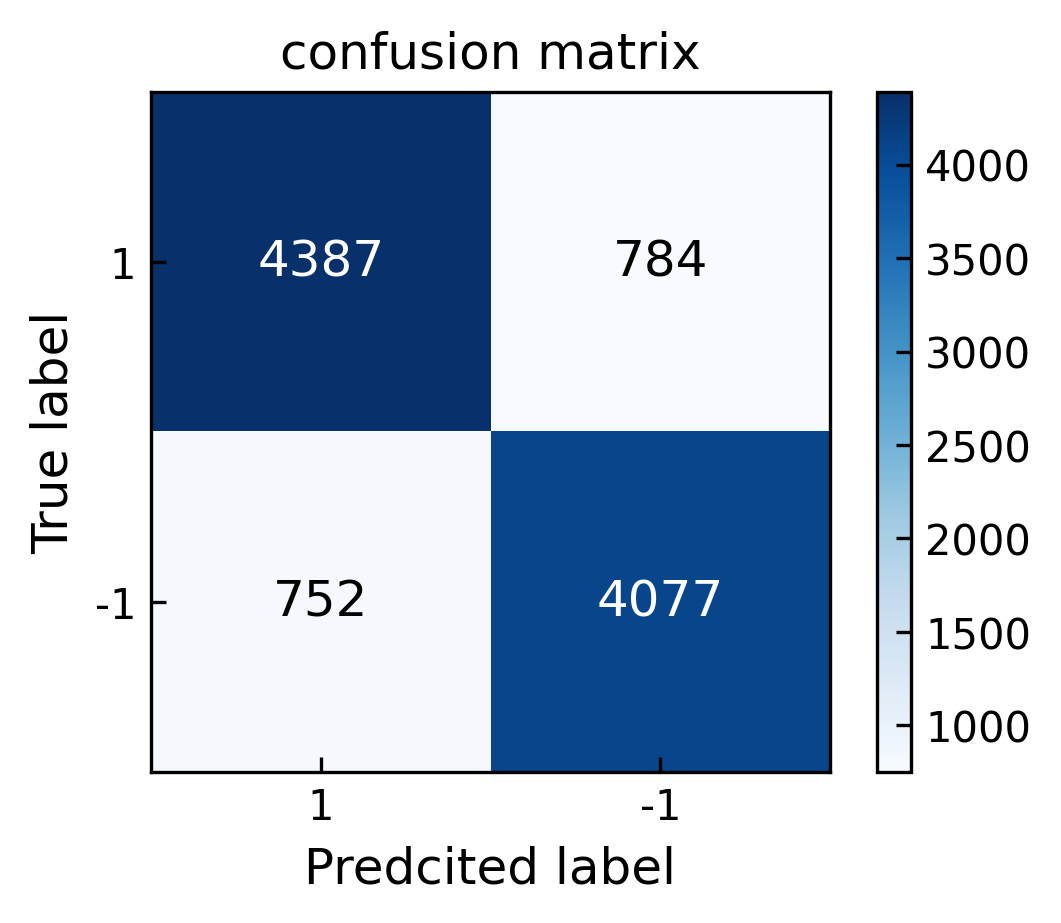

In [95]:
class_name = ["1", "-1"]
plot_confusion_matrix(y_true, y_predict, class_name)